In [39]:
%load_ext autoreload
%autoreload 2

import os
import sys

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from tqdm import tqdm

[autoreload of pkg_resources failed: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/opt/anaconda3/lib/python3.11/site-packages/pkg_resources/__init__.py", line 90, in <module>
    from jaraco.text import drop_comment, join_continuation, yield_lines
  File "/opt/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/jaraco/text/__init__.py", line 12, 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of setuptools failed: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/opt/anaconda3/lib/python3.11/site-packages/setuptools/__init__.py", line 248, in <module>
    monkey.patch_all()
  File "/opt/anaconda3/lib/python3.11/site-packages/setuptools/monkey.py", line 82, in patch_all
    module.Distribution = setuptools.dist.Distribution
         

In [40]:
#Move up to RAFTS directory
if os.getcwd().endswith('/RAFTS'):
    pass
else:
    os.chdir('..')
sys.path.append("../") # go to parent dir


In [41]:

from utils import filt_interp, dpar, dtan, lamb_eff_md, dcr_offset, celest_to_pa, inverse_Teff, inverseTeff, inverseWeff, lorentzian, find_min_max_adjacent, variance_weighted_mean, chrDistAng
import globals

from config import *


In [42]:
!pwd

/Users/fbianco/RAFTS


In [43]:
# Read in data for analysis
dpar_arr = np.load('Outdata/dpar_arr.npy')
dpar_raw = np.load('Outdata/dpar_raw.npy')
dpar_subtracted = np.load('Outdata/dpar_subtracted.npy')
dpar_smoothed = np.load('Outdata/dpar_smoothed.npy')
dparerr_smoothed = np.load('Outdata/dparerr_smoothed.npy')
dparerr = np.load('Outdata/dparerr.npy')
delta_g_mag = np.load('Outdata/delta_g_mag.npy')
delta_g_mag_err = np.load('Outdata/delta_g_mag_err.npy')
ras = np.load('Outdata/ras.npy')
decs = np.load('Outdata/decs.npy')
raerrs = np.load('Outdata/raerrs.npy')
decerrs = np.load('Outdata/decerrs.npy')
times = np.load('Outdata/times.npy')
dt_sec = np.load('Outdata/dt_sec.npy')
imnames_timeordered = np.load('Outdata/imnames_timeordered.npy')

In [44]:
assert times.shape == dpar_subtracted.shape == dparerr.shape == delta_g_mag_err.shape == delta_g_mag.shape, "WARNING: some arrays have different size"


In [45]:
start = 8
end = 82

In [46]:
dparr_df = pd.DataFrame.from_dict({"mjd":times,
            "dpar":dpar_raw,
              "dpar_clean":dpar_subtracted,
             "dpar_error":dparerr,
              "g_mag":  delta_g_mag,
              "g_mag_err":  delta_g_mag_err,
             }).iloc[start:end]

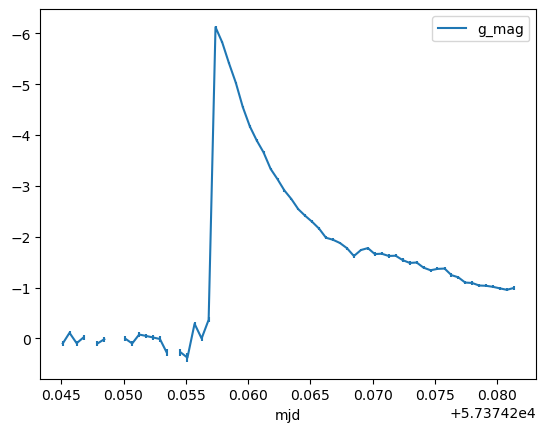

In [47]:
ax = dparr_df.plot(x="mjd", y="g_mag", yerr="g_mag_err")
ax.invert_yaxis()

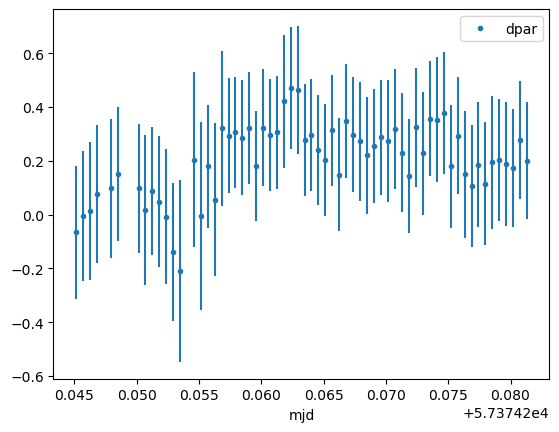

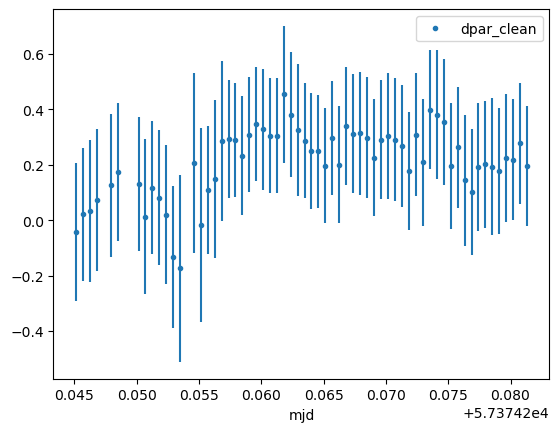

In [52]:
ax = dparr_df.plot(x="mjd", y="dpar", fmt= '.', yerr="dpar_error")
ax = dparr_df.plot(x="mjd", y="dpar_clean", fmt= '.', yerr="dpar_error")


In [38]:
dparr_df.to_csv("Outdata/dwf30225_545707_dpar.csv", index=False)